In [4]:
# Dataset is already in repo folder 'Data'

import pandas as pd

raw = pd.read_csv("../Data/00 - raw.csv")
raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# For simplicity's sake, I prefer that headers be lower-case
raw.columns = [col.lower() for col in raw.columns]
raw.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [6]:
# Data Shape
raw.shape

(506, 14)

### Assess completeness of data

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### All of the data is numeric and no nulls exist
#### No PII or Row IDs, all inherently predictive
#### For instruction's sake, I'm going to treat this like a big, nasty dataset anyway

In [5]:
# I create this function because I will re-run as I address nulls

def calc_nulls(data):
    nulls = data.isna().sum()
    df = pd.DataFrame(nulls,columns=["counts"])
    df["perc"] = round(100 * df.counts / len(df),1)
    df.sort_values("counts",ascending=False,inplace=True)
    return df

calc_nulls(raw)

,counts,perc
crim,0,0.0
zn,0,0.0
indus,0,0.0
chas,0,0.0
nox,0,0.0
rm,0,0.0
age,0,0.0
dis,0,0.0
rad,0,0.0
tax,0,0.0


##### There are no null values in this dataset.
##### If there were, I would plan to drop any features > 50% null.
##### But are all of the non-null values real?

In [7]:
# Since all features are currently numeric, we can jump straight to their descriptive statistics
# With objects present, I would loop through those and look at value_counts
raw.describe().T


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<p>- Means and STD's vary greatly, this data is a strong candidate for standard scaling</p>
<p>- 'b' and 'tax' have extremely different distributions from the rest, these will be examined further</p>
<p>- According to the data dictionary, 'zn' is a proportion, 0-100 makes sense</p>
<p>- 'chas' is boolean but is coded as int, which is fine for our purposes</p>
<p>- 'rad' is an index, not an ordinal ranking. Encoding this feature will be necessary</p>

<p>No PII or row IDs, data dictionary suggests these are all valid features</p>

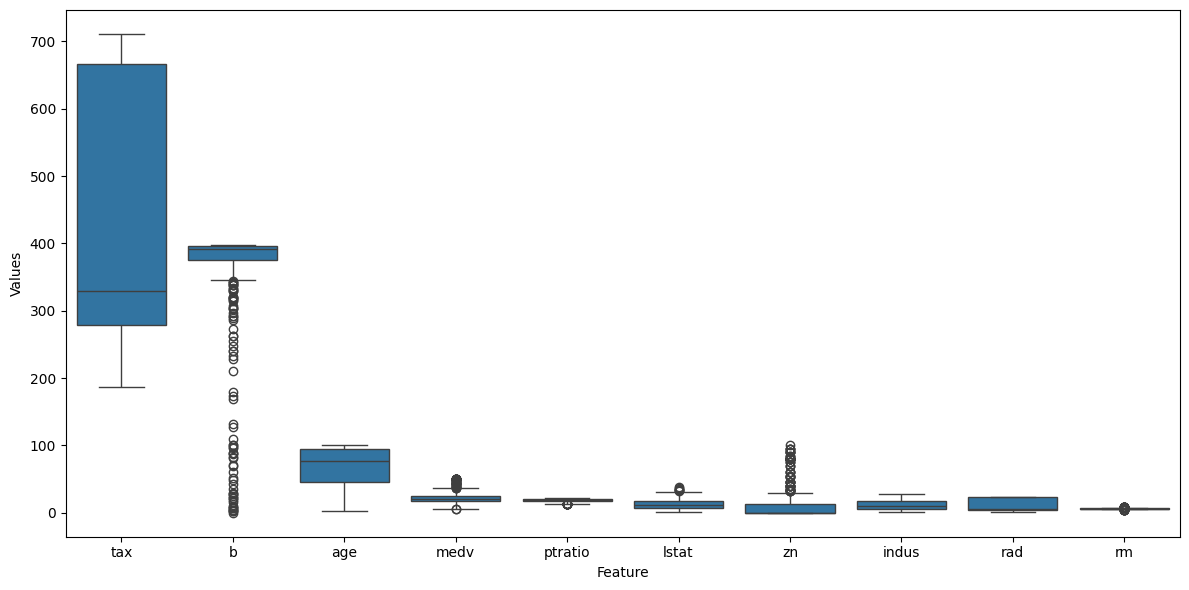

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature names of top 10 means from describe()
top_10_means = raw.describe().T.sort_values("mean",ascending=False).head(10).index

# Pivot the dataframe features and values into a single column
# 506 rows of 10 features becomes a df with two columns and (506 x 10) rows
melted = raw[top_10_means].melt(var_name="Feature",value_name="Values")

plt.figure(figsize=(12,6))
sns.boxplot(x="Feature", y="Values", data=melted)
plt.tight_layout()
plt.show();

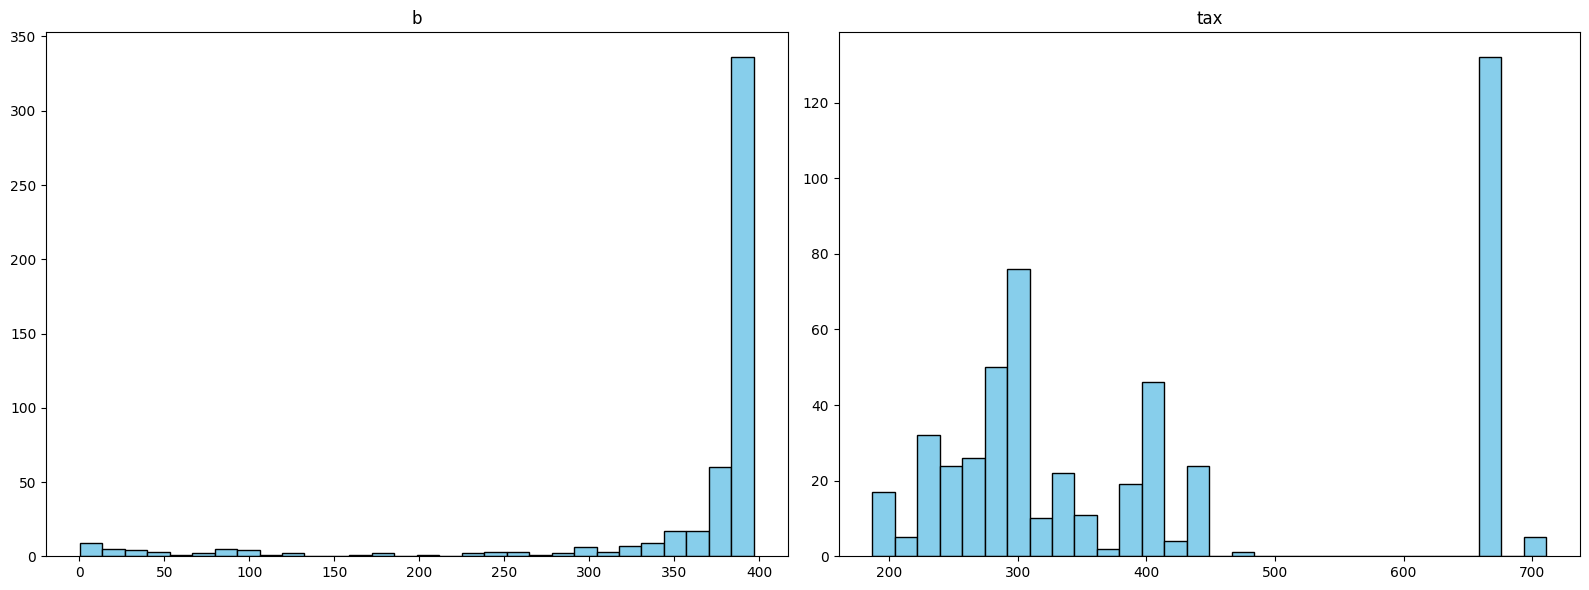

In [11]:
# Histograms of b and tax


fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].hist(raw.b,bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("b")

axes[1].hist(raw.tax,bins=30, color='skyblue', edgecolor='black')
axes[1].set_title("tax")

plt.tight_layout();

<p>Given the lack of normality, 'b' and 'tax' are strong log-normal transformation candidates</p>
<p>This decision will be made after standard scaling</p>

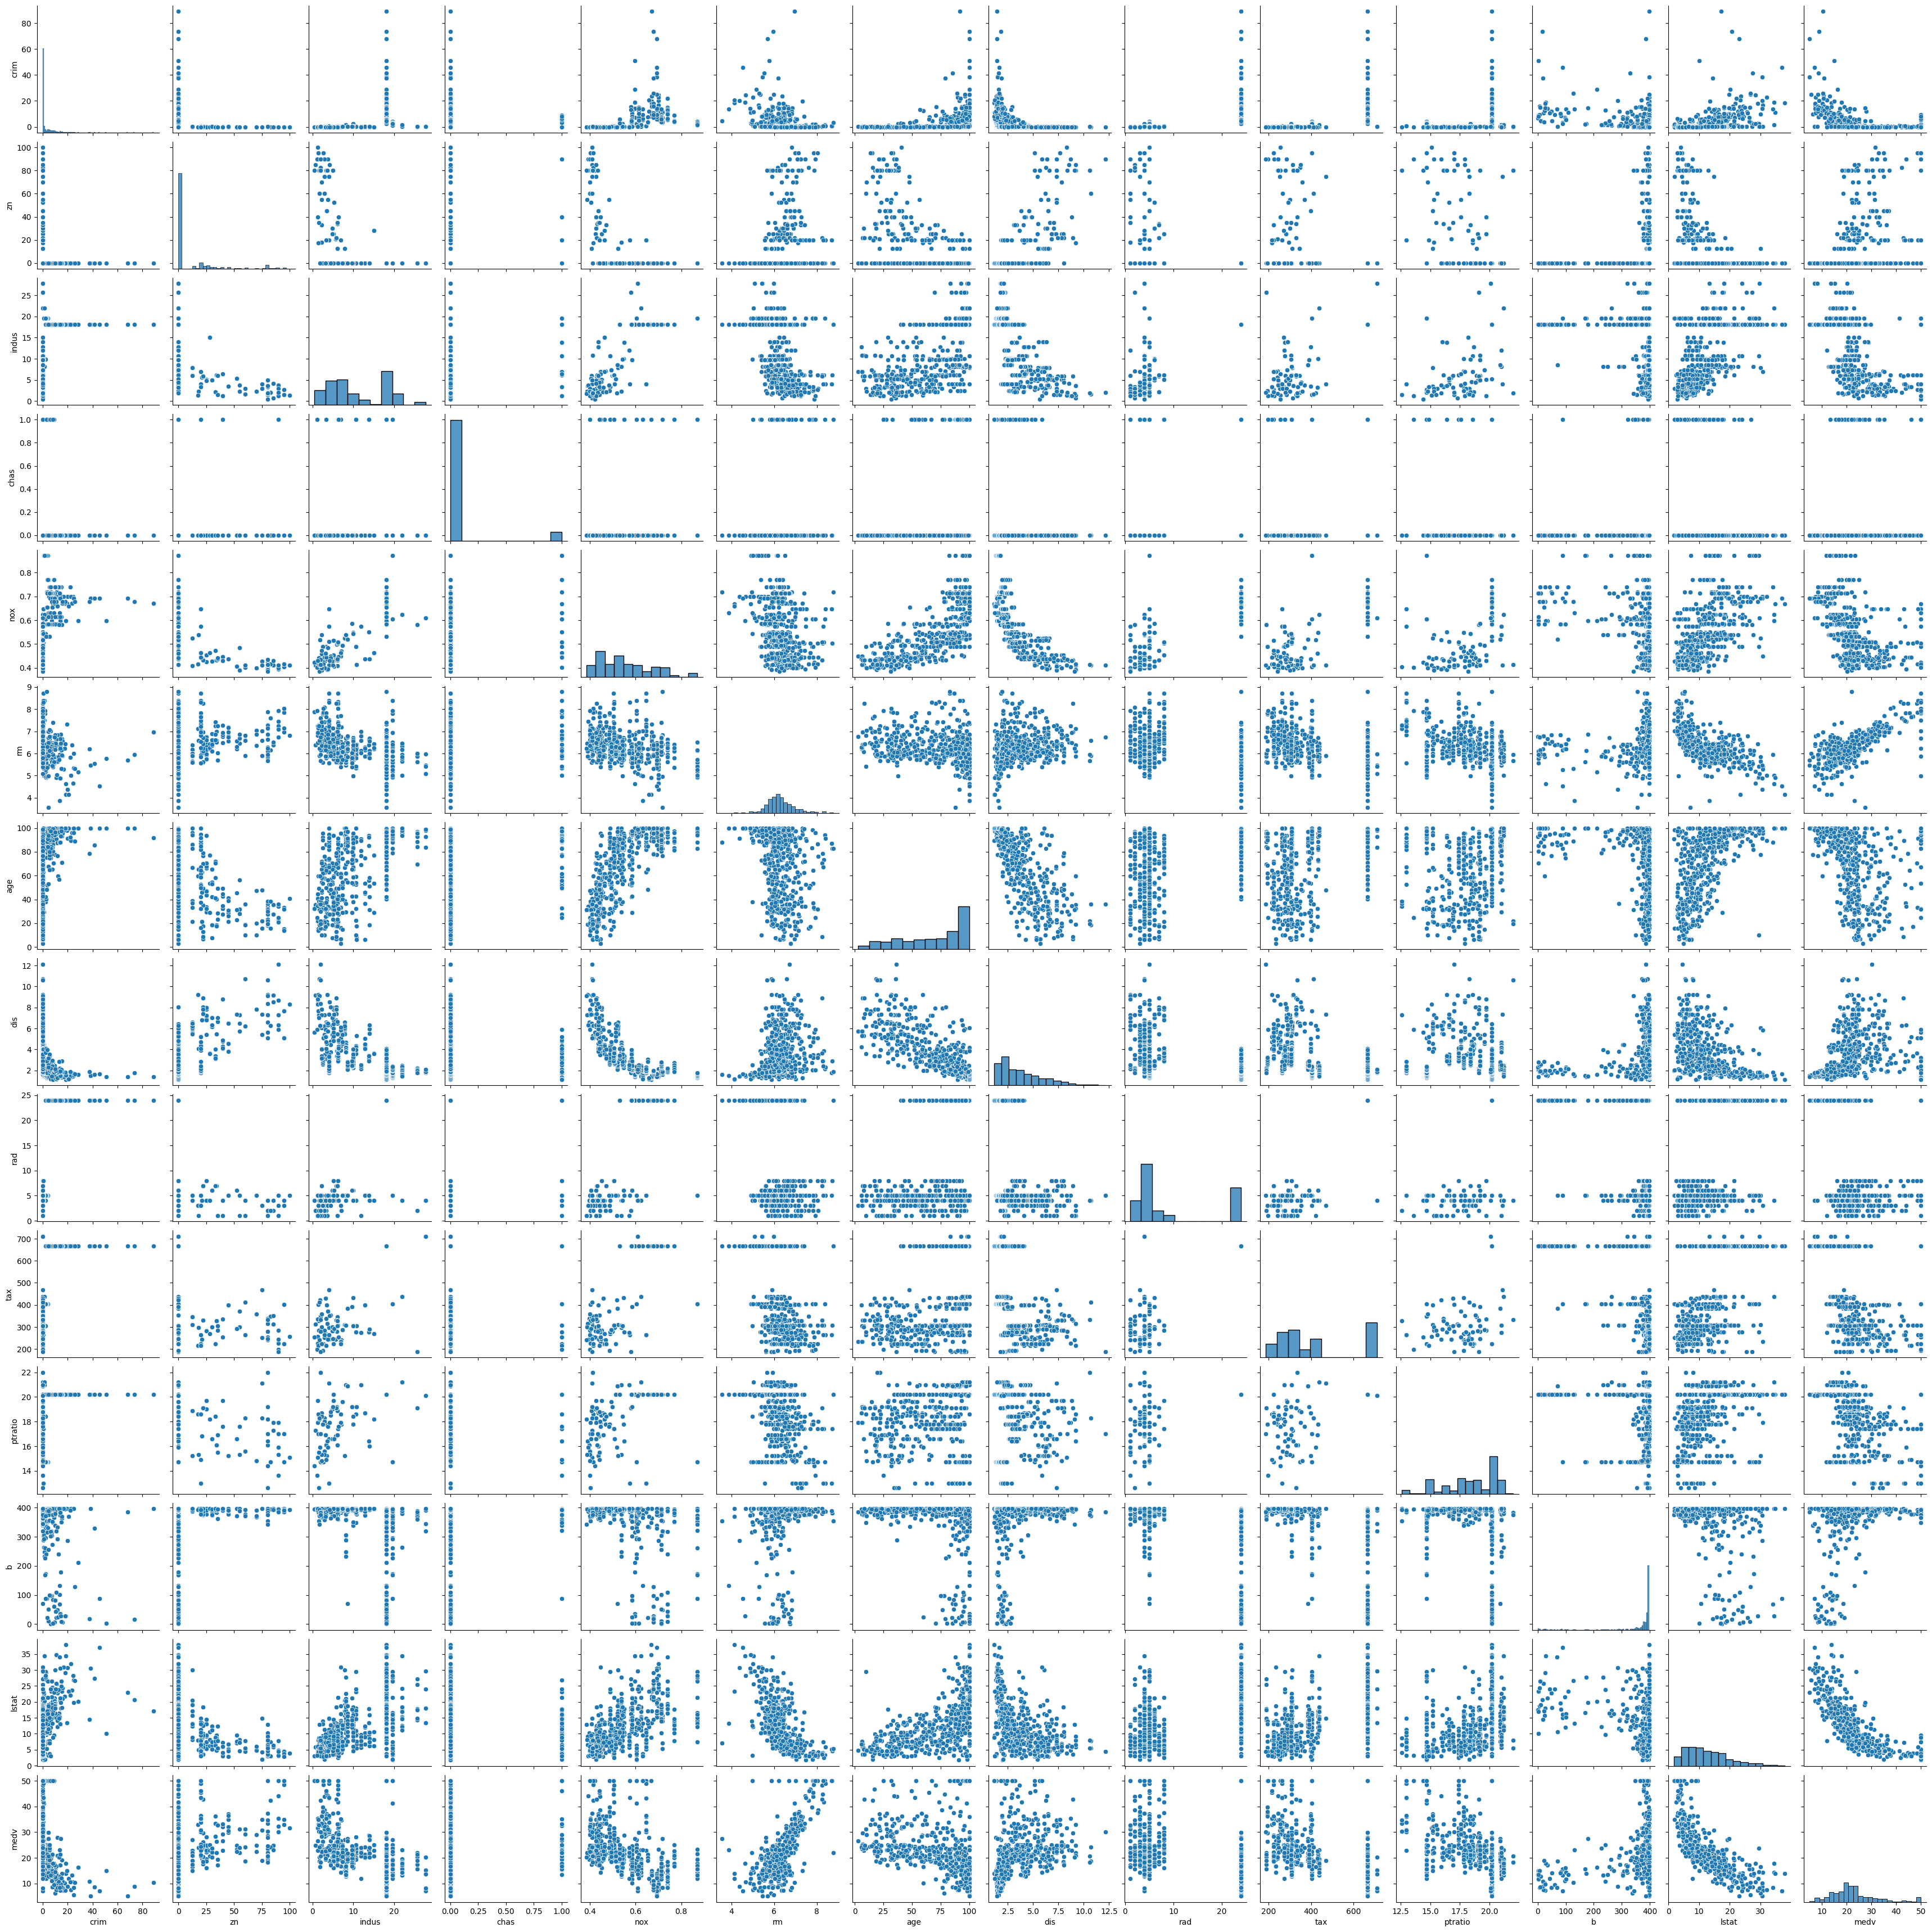

In [ ]:
##### EDA
# With such a low-dimensional dataset free of nulls, all the pretty charts are feasible
# See alternatives below for visualizing relationships of the most highly-correlated
sns.pairplot(raw);

At first glance, none of this data appears to be linear to our target 'medv'

In [ ]:
"""
Pearson:
    Use when you expect a linear relationship and the data meets assumptions (normality, homoscedasticity).
    Works well with normally distributed data.
    Appropriate for continuous, normally distributed variables.

    You’re looking at the relationship between age and income, assuming people with age and income increase in a linear fashion.

Spearman:
    Use when you suspect a monotonic relationship, but not necessarily linear.
    More appropriate for data that isn't normally distributed or has outliers.
    More flexible, working with ordinal data, non-linear relationships, and non-normal distributions.

    You’re looking at the relationship between education level (ordinal) and income, where income may increase monotonically but not in a strictly linear fashion.
"""

In [16]:
# The visuals are great for lower-dimension datasets but I prefer numeric methods

target_corr_sp = pd.DataFrame(raw.corr(method="spearman")["medv"])
target_corr_sp["abs"] = target_corr_sp.apply(lambda x: abs(x))
target_corr_sp = target_corr_sp.sort_values("abs", ascending=False)
target_corr_sp = target_corr_sp[target_corr_sp.medv < 1]
target_corr_sp

,medv,abs
lstat,-0.852914,0.852914
rm,0.633576,0.633576
indus,-0.578255,0.578255
nox,-0.562609,0.562609
tax,-0.562411,0.562411
crim,-0.558891,0.558891
ptratio,-0.555905,0.555905
age,-0.547562,0.547562
dis,0.445857,0.445857
zn,0.438179,0.438179


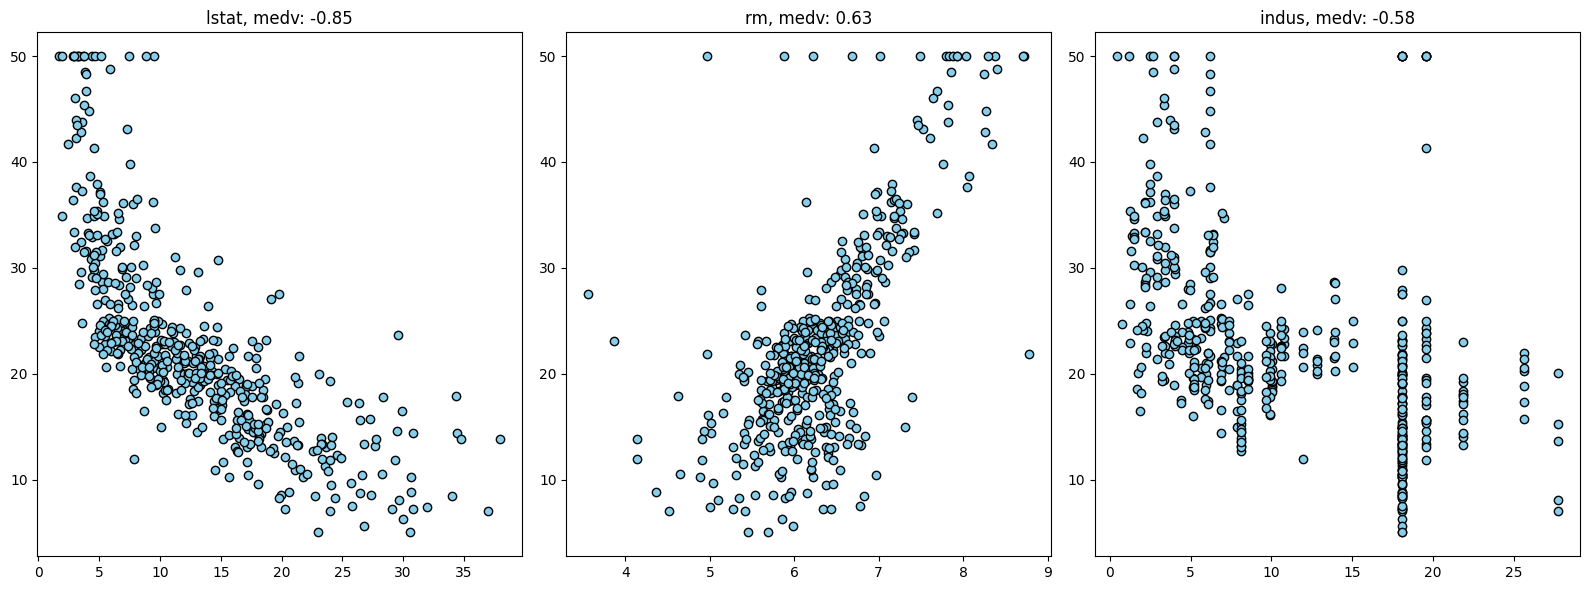

In [17]:
#### Top 3 strongest correlations to target
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

for i in range(3):
    axes[i].scatter(raw[target_corr_sp.index[i]], raw.medv, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{target_corr_sp.index[i]}, medv: {round(target_corr_sp.loc[target_corr_sp.index[i],'medv'],2)}")

plt.tight_layout();

It's very easy to see why these correlate with 'medv'...but these are not as linear as their correlations would suggest

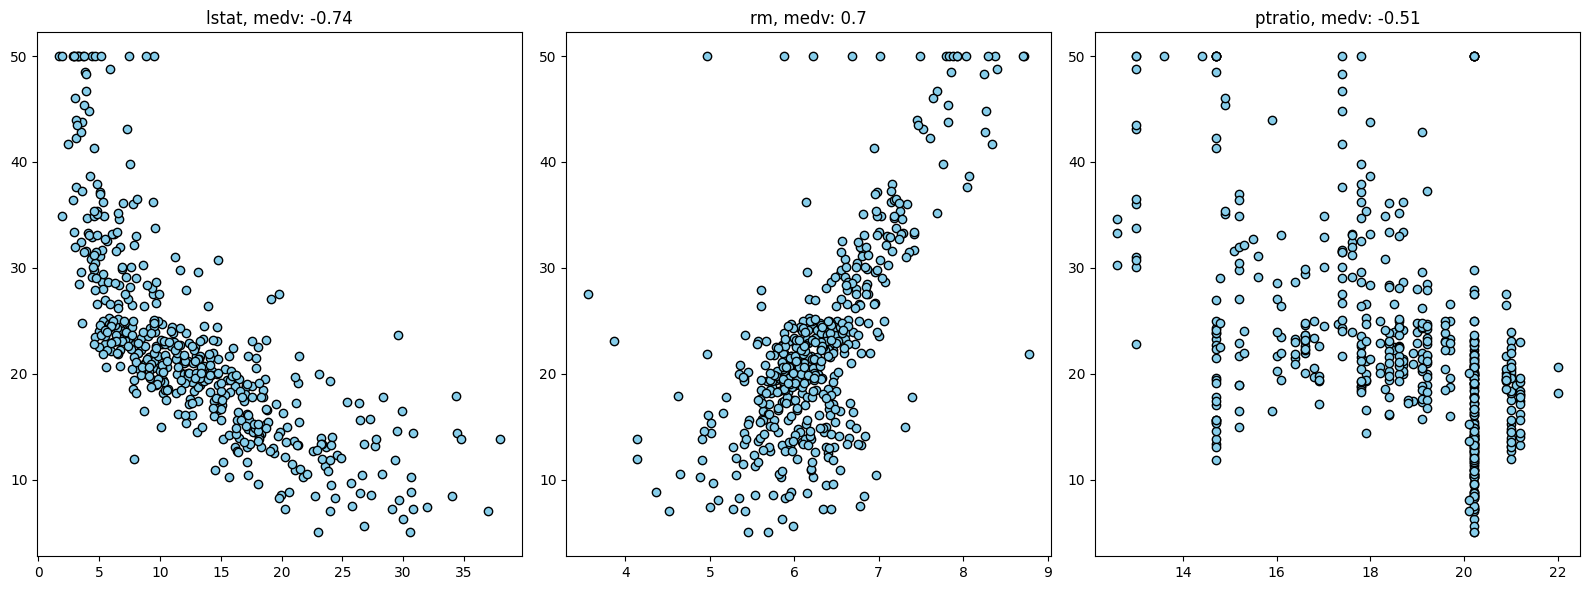

In [14]:
target_corr = pd.DataFrame(raw.corr()["medv"])
target_corr["abs"] = target_corr.apply(lambda x: abs(x))
target_corr = target_corr.sort_values("abs", ascending=False)
target_corr = target_corr[target_corr.medv < 1]

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

for i in range(3):
    axes[i].scatter(raw[target_corr.index[i]], raw.medv, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{target_corr.index[i]}, medv: {round(target_corr.loc[target_corr.index[i],'medv'],2)}")

plt.tight_layout();

In [18]:
corr_df_sp = raw.corr(method="spearman").unstack().reset_index()
corr_df_sp.columns = ["feat_1","feat_2","correlation"]
corr_df_sp["pairs"] = corr_df_sp.apply(lambda x: sorted([x["feat_1"],x["feat_2"]]),axis=1)
corr_df_sp.drop_duplicates(subset=["pairs"],inplace=True)
corr_df_sp.drop(["feat_1","feat_2"],axis=1,inplace=True)
corr_df_sp = corr_df_sp[corr_df_sp.correlation < 1]
corr_df_sp["abs"] = corr_df_sp.correlation.abs()
corr_df_sp = corr_df_sp.sort_values("abs",ascending=False)
corr_df_sp.reset_index(drop=True,inplace=True)
corr_df_sp.loc[:15,]

,correlation,pairs,abs
0,-0.880015,"[dis, nox]",0.880015
1,-0.852914,"[lstat, medv]",0.852914
2,0.821465,"[crim, nox]",0.821465
3,-0.801610,"[age, dis]",0.801610
4,0.795153,"[age, nox]",0.795153
5,0.791189,"[indus, nox]",0.791189
6,-0.757080,"[dis, indus]",0.757080
7,-0.744986,"[crim, dis]",0.744986
8,0.735524,"[crim, indus]",0.735524
9,0.729045,"[crim, tax]",0.729045


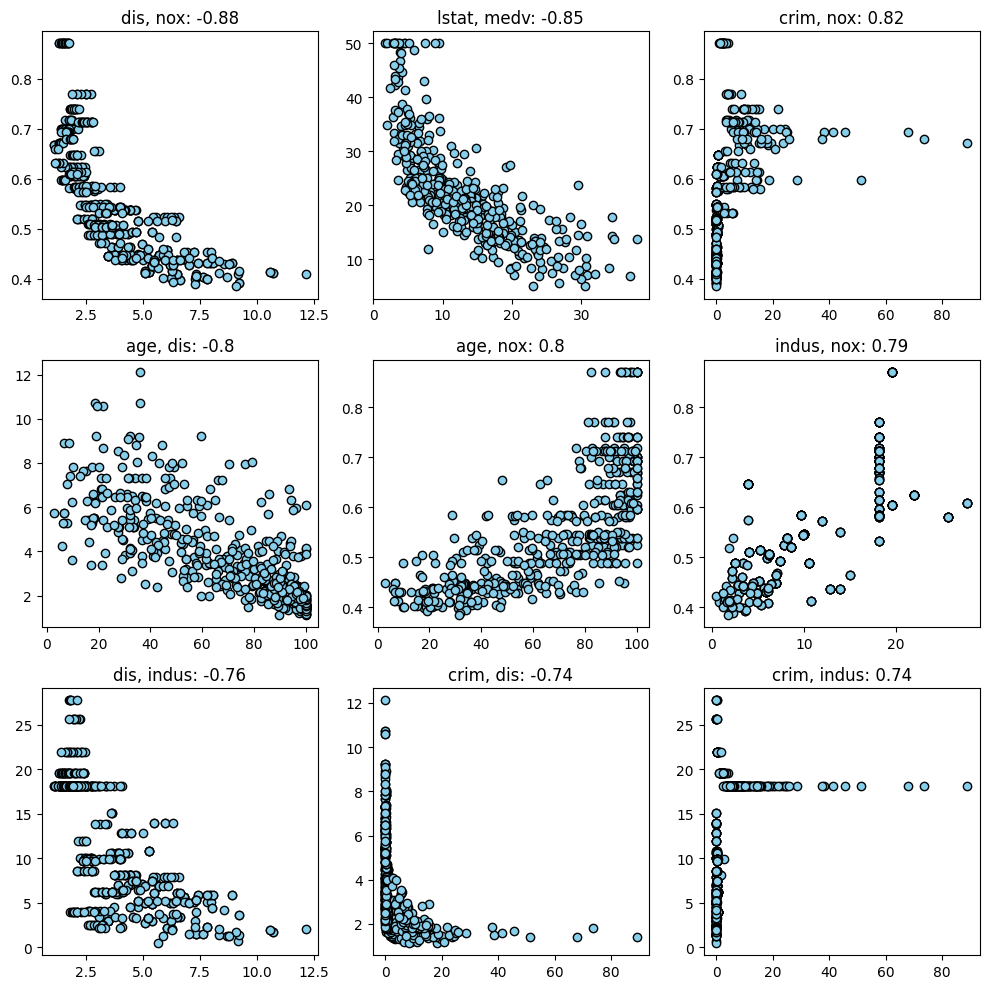

In [19]:
#### Top 9 strongest feature correlations
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for i in range(9):
    feat1, feat2 = corr_df_sp.loc[i]["pairs"]
    c = round(corr_df_sp.loc[i]["correlation"],2)
    
    axes[i//3, i%3].scatter(raw[feat1], raw[feat2], color='skyblue', edgecolor='black')
    axes[i//3, i%3].set_title(f"{feat1}, {feat2}: {c}")

plt.tight_layout();

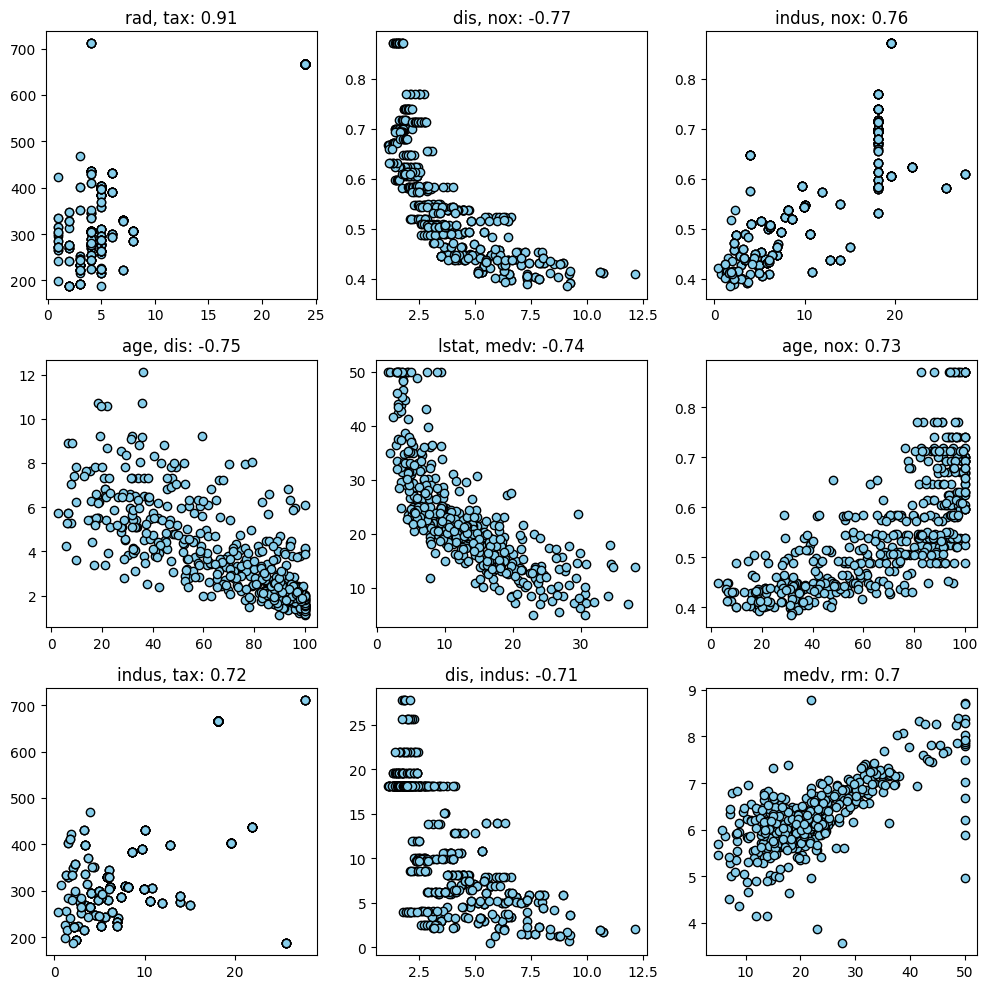

In [ ]:
corr_df = raw.corr().unstack().reset_index()
corr_df.columns = ["feat_1","feat_2","correlation"]
corr_df["pairs"] = corr_df.apply(lambda x: sorted([x["feat_1"],x["feat_2"]]),axis=1)
corr_df.drop_duplicates(subset=["pairs"],inplace=True)
corr_df.drop(["feat_1","feat_2"],axis=1,inplace=True)
corr_df = corr_df[corr_df.correlation < 1]
corr_df["abs"] = corr_df.correlation.abs()
corr_df = corr_df.sort_values("abs",ascending=False)
corr_df.reset_index(drop=True,inplace=True)

#### Top 9 strongest feature correlations
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for i in range(9):
    feat1, feat2 = corr_df.loc[i]["pairs"]
    c = round(corr_df.loc[i]["correlation"],2)
    
    axes[i//3, i%3].scatter(raw[feat1], raw[feat2], color='skyblue', edgecolor='black')
    axes[i//3, i%3].set_title(f"{feat1}, {feat2}: {c}")

plt.tight_layout();

In [30]:
########### Adjust for pearson/spearman!!!!!
features = target_corr_sp.index[:10].to_list() + ["medv"]     # Add/remove _sp, change label
heat_features = raw[features]      
heat_corr = heat_features.corr(method="spearman")   # Add/remove method="spearman"
heat_corr

,lstat,rm,indus,nox,tax,crim,ptratio,age,dis,zn,medv
lstat,1.000000,-0.640832,0.638747,0.636828,0.534423,0.634760,0.467259,0.657071,-0.564262,-0.490074,-0.852914
rm,-0.640832,1.000000,-0.415301,-0.310344,-0.271898,-0.309116,-0.312923,-0.278082,0.263168,0.361074,0.633576
indus,0.638747,-0.415301,1.000000,0.791189,0.664361,0.735524,0.433710,0.679487,-0.757080,-0.642811,-0.578255
nox,0.636828,-0.310344,0.791189,1.000000,0.649527,0.821465,0.391309,0.795153,-0.880015,-0.634828,-0.562609
tax,0.534423,-0.271898,0.664361,0.649527,1.000000,0.729045,0.453345,0.526366,-0.574336,-0.371394,-0.562411
crim,0.634760,-0.309116,0.735524,0.821465,0.729045,1.000000,0.465283,0.704140,-0.744986,-0.571660,-0.558891
ptratio,0.467259,-0.312923,0.433710,0.391309,0.453345,0.465283,1.000000,0.355384,-0.322041,-0.448475,-0.555905
age,0.657071,-0.278082,0.679487,0.795153,0.526366,0.704140,0.355384,1.000000,-0.801610,-0.544423,-0.547562
dis,-0.564262,0.263168,-0.757080,-0.880015,-0.574336,-0.744986,-0.322041,-0.801610,1.000000,0.614627,0.445857
zn,-0.490074,0.361074,-0.642811,-0.634828,-0.371394,-0.571660,-0.448475,-0.544423,0.614627,1.000000,0.438179


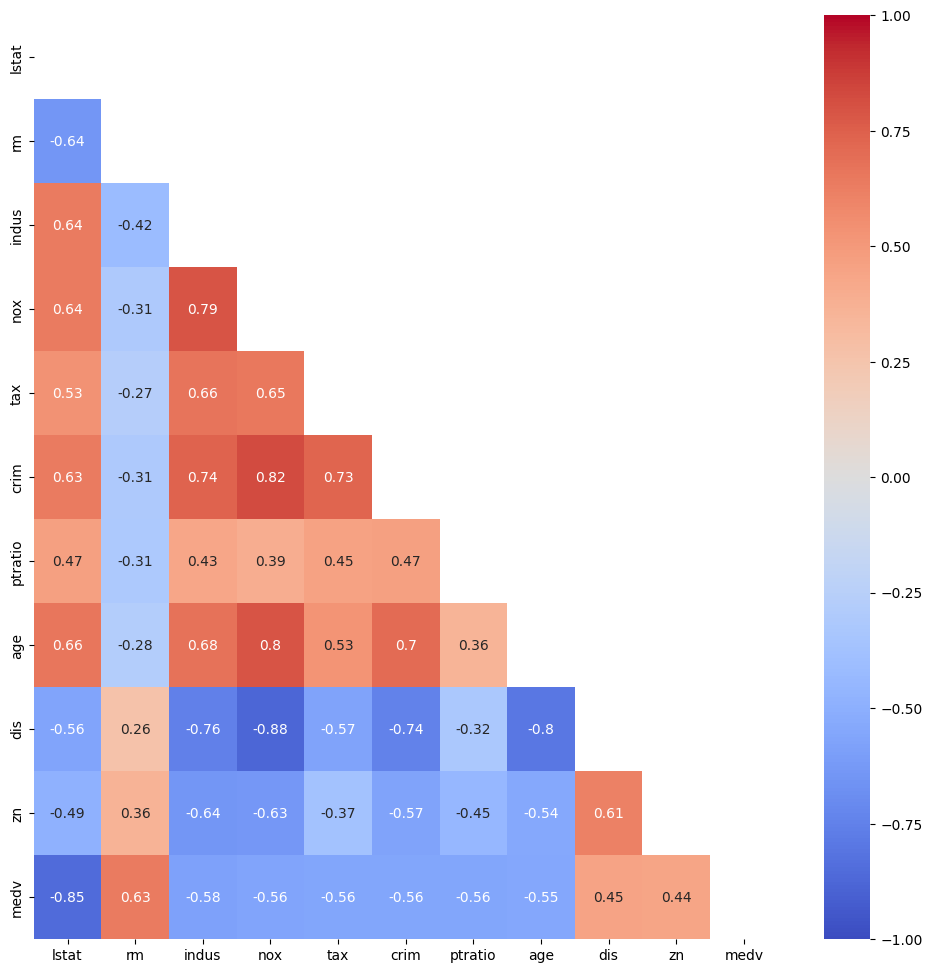

In [32]:
# Spearman over Pearson, since data is clearly non-linear to 'medv'
import numpy as np
mask = np.triu(np.ones_like(heat_corr))

plt.figure(figsize=(12,12))
sns.heatmap(heat_corr,
            vmin=-1,vmax=1,center=0,
            cmap='coolwarm',
            annot=True,
            mask=mask)

plt.show()